In [218]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

%matplotlib inline

In [271]:
# - 형선이 피클 훑기
dir = '../SamsungCard2020/track2/data'
## Load pickle
with open(dir+"/yoy_rate_table.pkl","rb") as fr:
    data = pickle.load(fr)

In [272]:
data[data['Category']=='디저트'].sort_values(by='Value')

,Category,Segment,Value
3355,디저트,Sex=1|Age=A|Elementary=high,-99.84
14019,디저트,Sex=1|Age=A|Marriage=high|Elementary=high,-99.84
9115,디저트,Age=A|Elementary=high|Housewife=mid,-99.79
26826,디저트,Age=A|Marriage=high|Elementary=high|Housewife=mid,-99.79
40974,디저트,Sex=1|Age=A|Marriage=high|Elementary=high|Hous...,-99.79
...,...,...,...
26152,디저트,Age=B|Marriage=high|Elementary=high|Mid-High=low,285.71
32982,디저트,Marriage=high|Youth=low|Elementary=high|Mid-Hi...,285.71
55043,디저트,Age=B|Marriage=high|Youth=low|Elementary=high|...,285.71
28371,디저트,Age=B|Youth=low|Elementary=high|Mid-High=low,285.71


# data import

In [221]:
data_path = '../SamsungCard2020/raw/'
trend_w_demo = pd.read_csv(data_path + '[Track2_데이터1] trend_w_demo.csv', engine='python')

In [ ]:
trend_w_demo.head()

- Trend_w_demo 데이터 설명

|Column| Description|  
|------------|------------------| 
|YM	|이용 연월| 
|Category|	이용 업종 | 
|성별구분|	0: 남성, 1: 여성|  
|연령대|	연령 구간. 알파벳 순서와 연령 순서는 무관.  |
|기혼스코어|	 카드 이용 고객이 기혼일 확률|  
|유아자녀스코어|	 카드 이용 고객이에게 유아자녀가 있을 확률  |
|초등학생자녀스코어| 카드 이용 고객이에게 초등학생 자녀가 있을 확률  |
|중고생자녀스코어|카드 이용 고객이에게 중고생 자녀가 있을 확률  |
|대학생자녀스코어|	카드 이용 고객이에게 대학생 자녀가 있을 확률  |
|전업주부스코어|	카드 이용 고객이 전업주부일 확률  |


## First Look  
1. 업종별 고객의 차이 탐색  => 2019/2020 변화에 주목

**2019년 4월-5월  /  2020년 4월-5월  고객 소비 데이터**
- 업종별 구분
    - 연도별 구분
        - 업종에 따른 고객군의 특성을 분류
            - 업종에 따른 고객군 차이 파악
            - 업종에 따른 고객군 공통점 파악 

### 데이터 변환
- total_df : 문자열로 되어있는 범주형 자료들을 범주 개수에 맞게 숫자로 변환하여 점수화
    - 이때 연령대는 제외 ( 순서가 있는 범주가 아님 )  

|Column|범주 종류|범위|
|------|---|---|
| 성별구분 | [0, 1] | 1~ 2 |
| 연령대 | ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] | 1~ 8 |
| 기혼스코어 | ['high', 'low', 'mid'] | 1~ 3 |
| 유아자녀스코어 | ['high', 'low', 'mid'] | 1~ 3 |
| 초등학생자녀스코어 | ['high', 'low', 'mid'] | 1~ 3 |
| 중고생자녀스코어 | ['high', 'low', 'mid'] | 1~ 3 |
| 대학생자녀스코어 | ['high', 'low', 'mid'] | 1~ 3 |
| 전업주부스코어 | ['high', 'low', 'mid'] | 1~ 3 |


In [ ]:
total_df = trend_w_demo.copy()

for col in Col_list[2:]:
    x = trend_w_demo[col].unique().tolist()
    dictionary = {name : index for index,name in enumerate(x)}
    total_df[col].replace(dictionary,inplace=True)

# 연령대 컬럼 제거
total_df.drop('연령대',axis=1,inplace=True)

### 업종별 데이터 분리
- df + '업종이름' : 업종별로 구분한 데이터

In [ ]:
C_list = total_df['Category'].unique().tolist()
df_list = []
for i in C_list:
    globals()[f'df{i}'] = total_df.loc[total_df['Category']==i]
    df_list.append(f'df{i}')

In [ ]:
df_list

In [ ]:
df디저트.head()

### 업종별 데이터 Pivoting 
- df_pivot + '업종이름' : `업종별 데이터`를 평균을 이용해 연도별로 점수화한 데이터  
    - 직관적인 시각화를 위해 4월 5월의 데이터를 합함

In [ ]:
# 동적 변수 불러오기 위해 sys  import
import sys
mod = sys.modules[__name__]

# df_pivot 데이터 생성
df_pivot_list = []
for i in C_list:
    df_col = getattr(mod,'df'+i)
    df_col['YM'].replace({202005:2020,202004:2020,201905:2019,201904:2019},inplace=True)
    globals()[f'df_pivot{i}'] = pd.pivot_table(df_col, index=['YM','Category'], aggfunc='mean')
    df_pivot_list.append(f'df_pivot{i}')

In [222]:
df_pivot디저트

,,기혼스코어,대학생자녀스코어,성별구분,유아자녀스코어,전업주부스코어,중고생자녀스코어,초등학생자녀스코어
YM,Category,,,,,,,
2019,디저트,0.397064,0.238072,0.535239,0.548825,0.548654,0.503937,1.000449
2020,디저트,0.356284,0.253017,0.521125,0.549006,0.520963,0.475224,1.268759


### Data Visualization

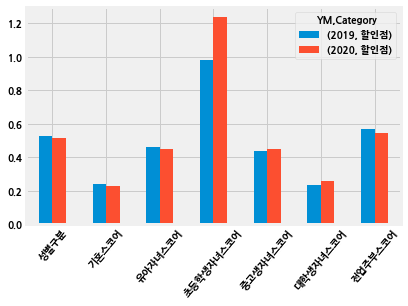

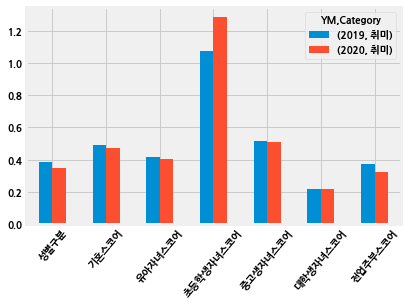

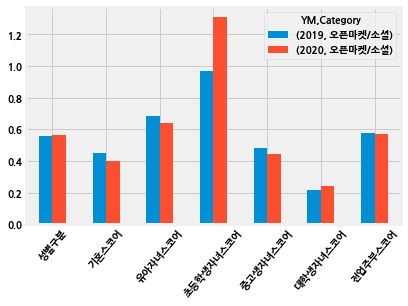

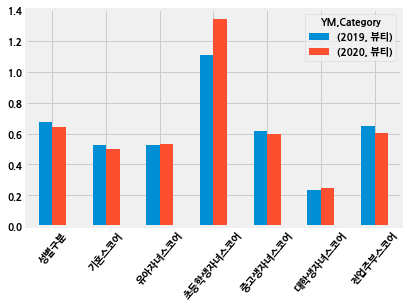

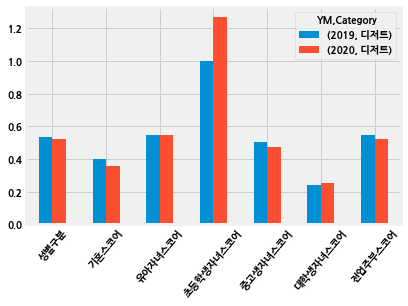

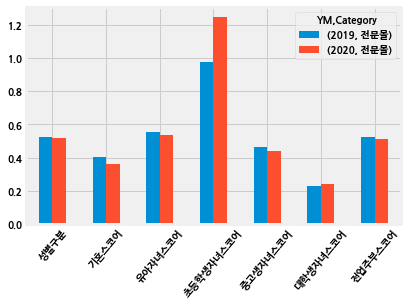

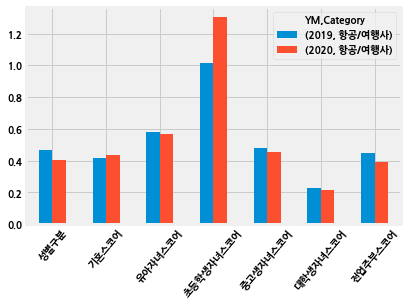

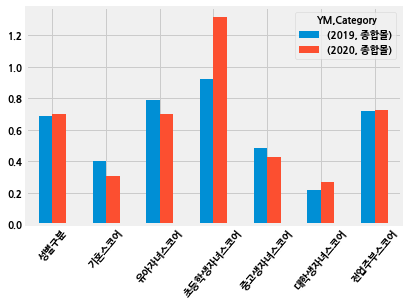

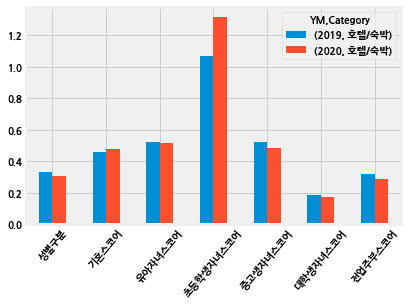

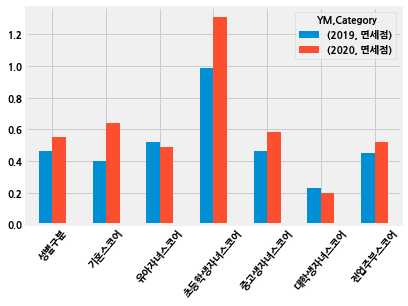

In [248]:
for i in df_pivot_list:
    df_pivot_col = getattr(mod,i)
    df_pivot_col = df_pivot_col[['성별구분','기혼스코어','유아자녀스코어',
                                     '초등학생자녀스코어','중고생자녀스코어',
                                    '대학생자녀스코어','전업주부스코어']]
    df_pivot_col.T.plot(kind='bar',rot=50)
    plt.show()

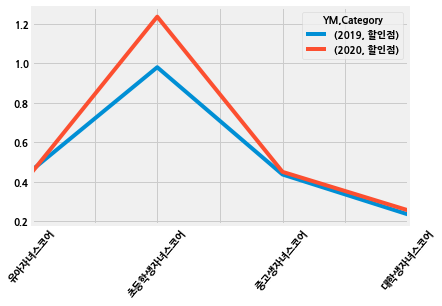

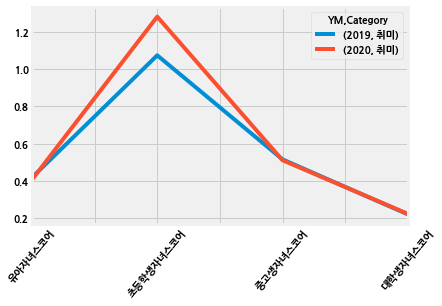

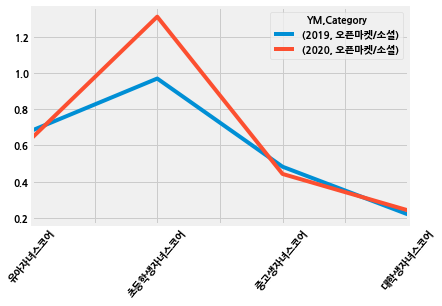

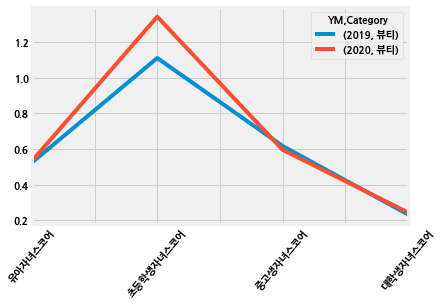

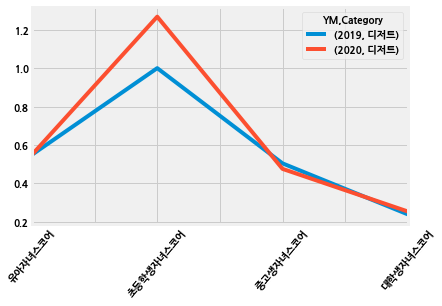

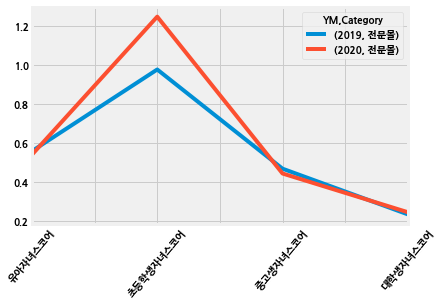

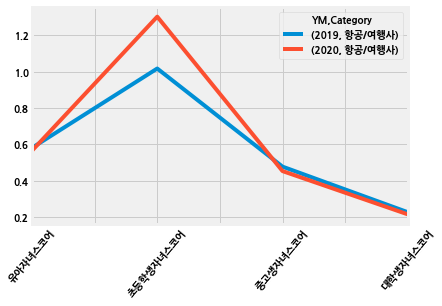

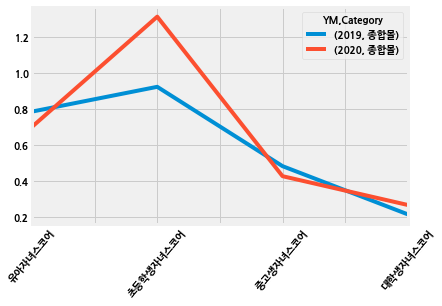

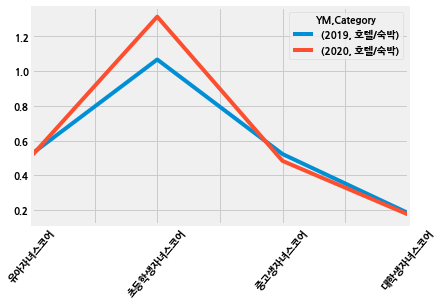

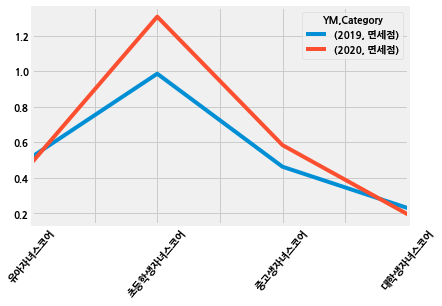

In [270]:
for i in df_pivot_list:
    df_pivot_col = getattr(mod,i)
    df_pivot_col = df_pivot_col[['유아자녀스코어','초등학생자녀스코어',
                                 '중고생자녀스코어','대학생자녀스코어']]
    df_pivot_col.T.plot(kind='line',rot=50)
    plt.show()

### 2019년 대비 사용률 상승 업종별 분석 

1. 대부분의 업종에서 초등학생 자녀스코어가 상승함  
    - 코로나로 인해 초등학생 자녀가 많아졌다? 
        - Why? => 코로나로 인한 등교 정지 
2. 업종간 고객의 특성에 대해서는 큰 차이가 보이지는 않음
    - 주제를 정해서 좀더 세부적으로 들어가야 될듯
        - 형선이가 세분화 해준 고객층을 정해서 해당 고객층의 연도별 변화..? 
   - 외부데이터가 필수적으로 들어가야 할듯 

----
- 참고 
    - 앤드류's 변화율 그래프

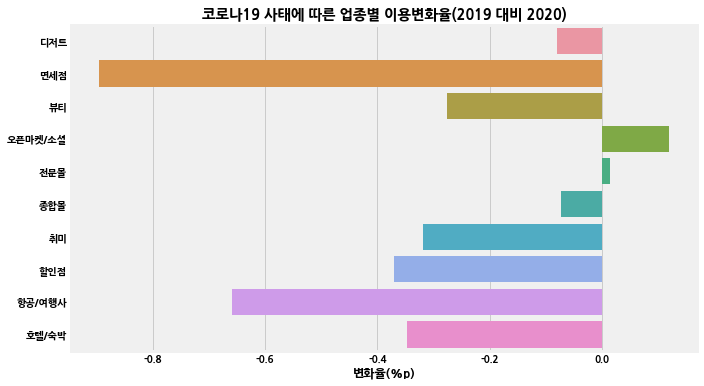

In [261]:
temp = (trend_w_demo[trend_w_demo['YM']>=202001]['Category'].value_counts()
        / trend_w_demo[trend_w_demo['YM']<202001]['Category'].value_counts()).to_frame('ratio').reset_index()

temp['ratio'] -= 1

plt.figure(figsize=(10,6))
sns.barplot(y='index', x='ratio', data=temp)
plt.ylabel('')
plt.xlabel('변화율(%p)')
plt.title('코로나19 사태에 따른 업종별 이용변화율(2019 대비 2020)')
plt.show()